# <center> LESSON 9: CASE STUDY with CREDIT SCORING </center>

## 1. PROBLEM

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

- **Input**: Historical data of 250,000 borrowers.
- **Output**: SeriousDlqin2yrs.
- **Goal**: Build a model that borrowers can use to help make the best financial decisions.

BASEL I, II, III, IV -> rules + ML algorithms

Reference: [Kaggle Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Variables descriptions

|Variables|Descriptions|
|-|-|
|**SeriousDlqin2yrs**| Person experienced 90 days past due delinquency or worse|
|**RevolvingUtilizationOfUnsecuredLines**| Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits|
|**age**| Age of borrower in years|
|**NumberOfTime30-59DaysPastDueNotWorse**| Number of times borrower has been 30-59 days past due but no worse in the last 2 years||
|**DebtRatio**| Monthly debt payments, alimony,living costs divided by monthy gross income
|**MonthlyIncome**| Monthly income|
|**NumberOfOpenCreditLinesAndLoans**| Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)|
|**NumberOfTimes90DaysLate**| Number of times borrower has been 90 days or more past due|
|**NumberRealEstateLoansOrLines**| Number of mortgage and real estate loans including home equity lines of credit|
|**NumberOfTime60-89DaysPastDueNotWorse**| Number of times borrower has been 60-89 days past due but no worse in the last 2 years|
|**NumberOfDependents**| Number of dependents in family excluding themselves (spouse, children etc.)|

### 2.2 Statistics

**Q1: Import necessary libraries: Pandas, Numpy, Matplotlib, Seaborn**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q2: Load data using pd.read_csv()**

In [2]:
df_train = pd.read_csv('cs-training.csv')
df_test = pd.read_csv('cs-test.csv')

**Q3: Get the first 5 rows of train set**

In [3]:
df_train.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_test.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


**Q4: Get number of rows and columns of  train set**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
df_train.shape, df_test.shape

((150000, 11), (101503, 11))

**Q5: Describe the distribution of train set**

In [7]:
df_train.describe() #boxplot

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


**Q6: Get information of train set by df.info()**

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

**Q7: Get the missing percent per columns of train set**

In [9]:
# sum(missing)/len(data)
df_train.isnull().sum()*100/len(df_train)

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

### 2.3 Visualization

**Q8: Target disitribution on train set via bar chart**

In [10]:
df_train.SeriousDlqin2yrs.value_counts()*100/len(df_train) #imbalanced data

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

In [11]:
plt.figure(figsize=(10,7))
df_train.SeriousDlqin2yrs.value_counts().plot(kind='bar', color=['red','green'])
plt.title('Target distribution')
plt.xlabel('Deliquency in 2 years')
plt.ylabel('Frequency');

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_train.SeriousDlqin2yrs);

**Q9: Correlation of features and target**

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(), annot=True);

**Q10: Describe features distribution and correlation given histogram and pairplot chart**

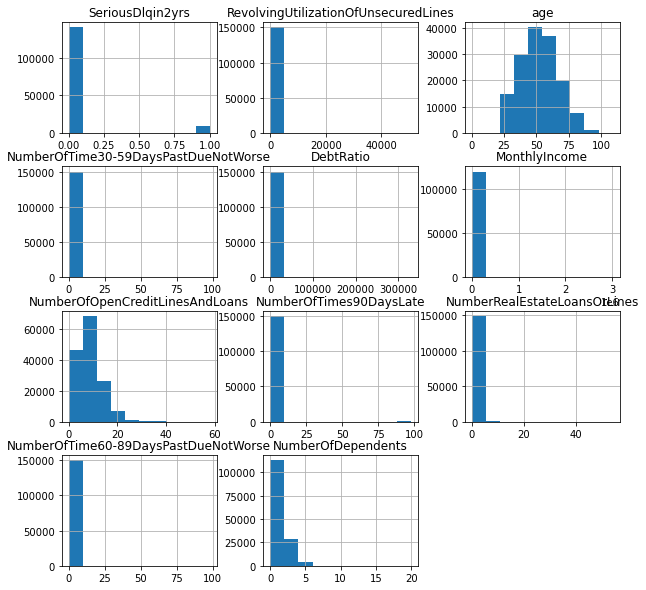

In [14]:
df_train.hist(figsize=(10,10));

**Q11: Explore each feature with target**

In [14]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [15]:
# sns.displot(df_train['RevolvingUtilizationOfUnsecuredLines']); #hisplot displot

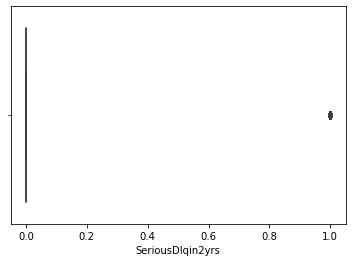

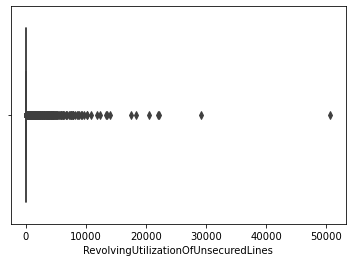

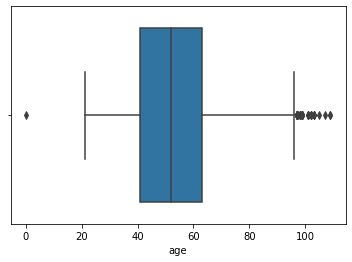

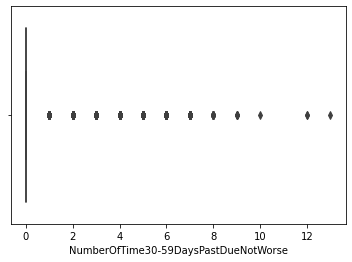

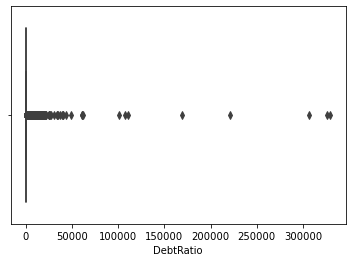

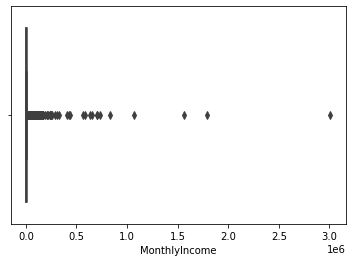

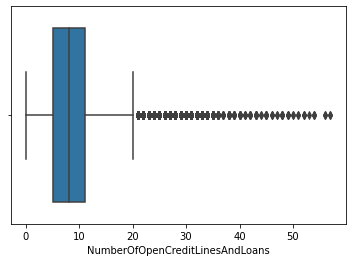

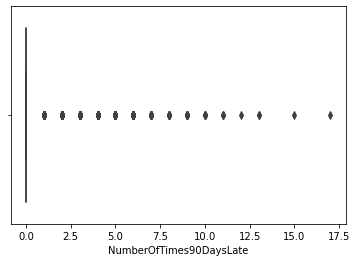

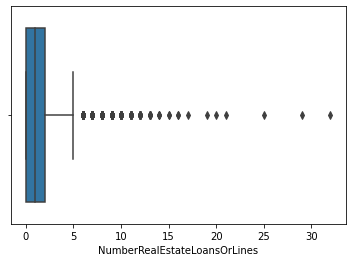

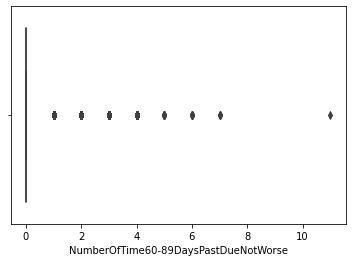

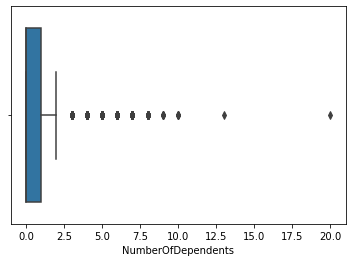

In [28]:
%matplotlib inline
for i in df_train.columns:
    sns.boxplot(data=df_train,x=df_train[i])
    plt.show()

<AxesSubplot:>

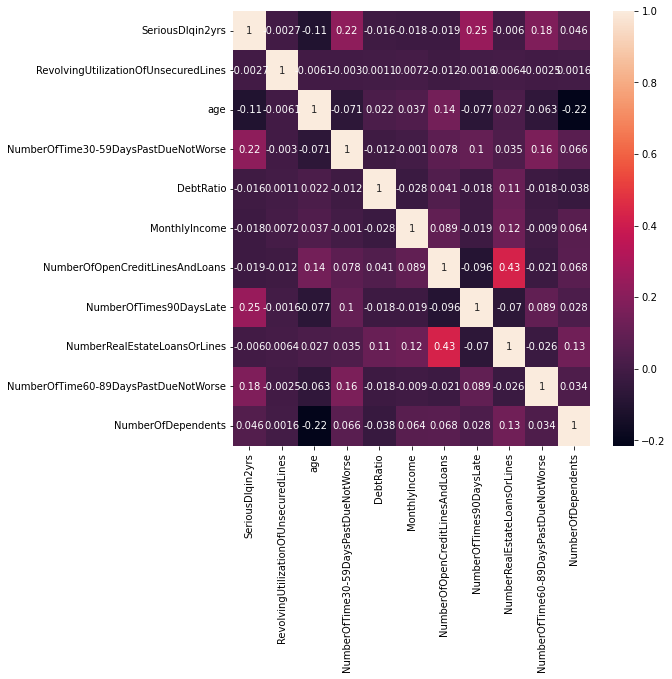

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr(),annot=True)

## 3. MODEL

**Q12: Handle outliers in dataset**

**Inter quantile range (IQR)**: any point < `Q1 - 1.5*IQR`, `>Q3+1.5IQR`
![](https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png)

In [16]:
from collections import Counter
def detect_outliers(df, n, features):
    """
    Input:
    df: DataFrame
    features: list containing column names
    """
    outlier_indices = []
    #Step1: iterate over features(columns)
    for col in features:
        # Step 2: Calculate 1st quantile (25%)
        Q1 = np.percentile(df[col], 25)
        # Step 3: Calculate 3rd quantile (75%)
        Q3 = np.percentile(df[col], 75)
        # Step 4: Calcualte IQR = Q3-Q1
        IQR = Q3 - Q1
        # Step 5: Outlier step < Q1 - 1.5IQR, > Q3+ 1.5IQR
        outlier_step = 1.5 * IQR
        # Step 6: Determine a list of indices of outlier for features (cols)
        outlier_list_col = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].index
        # Step 7: Append [1, 2, 3], [2,3] => [1,2,3,[2,3]], extend [1,2,3,2,3]
        outlier_indices.extend(outlier_list_col)
    # Select rows containing more than n outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n) # Take k given v > n
    return multiple_outliers

In [17]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [34]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
outliers_to_drop = detect_outliers(df_train, 2, features)

In [35]:
len(df_train), len(outliers_to_drop)

(146473, 38)

In [36]:
df_train = df_train.drop(outliers_to_drop, axis=0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146435 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      146435 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  146435 non-null  float64
 2   age                                   146435 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  146435 non-null  int64  
 4   DebtRatio                             146435 non-null  float64
 5   MonthlyIncome                         118189 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       146435 non-null  int64  
 7   NumberOfTimes90DaysLate               146435 non-null  int64  
 8   NumberRealEstateLoansOrLines          146435 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  146435 non-null  int64  
 10  NumberOfDependents                    142669 non-null  float64
dtype

**Q13: Merge train and test dataset**

In [40]:
dataset = pd.concat([df_train, df_test], axis = 0)#merge and join concat database
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247938 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Target         146435 non-null  float64
 1   UnsecLines     247938 non-null  float64
 2   age            247938 non-null  int64  
 3   Late3059       247938 non-null  int64  
 4   DebtRatio      247938 non-null  float64
 5   MonthlyIncome  199589 non-null  float64
 6   OpenCredit     247938 non-null  int64  
 7   Late90         247938 non-null  int64  
 8   PropLines      247938 non-null  int64  
 9   Late60-89      247938 non-null  int64  
 10  Deps           241546 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 22.7 MB


**Q14: Rename columns name into shorter alias**

In [38]:
dataset = dataset.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

df_train = df_train.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

df_test = df_test.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

**Q15: Building binary/dummy variables**
**Hints**: Quantile data first

||space between 2 bins|frequency of samples per bins|
|-|-|-|
|`cut`|equal|different|
|`qcut`|unequal|(almost) same|

In [47]:
pd.qcut(dataset.UnsecLines, 5).value_counts()
#continuous thì get dummy

(-0.001, 0.0189]    49588
(0.0808, 0.262]     49588
(0.682, 50708.0]    49588
(0.0189, 0.0808]    49587
(0.262, 0.682]      49587
Name: UnsecLines, dtype: int64

In [48]:
dataset.UnsecLines = pd.qcut(dataset.UnsecLines.values, 5).codes # 0-4

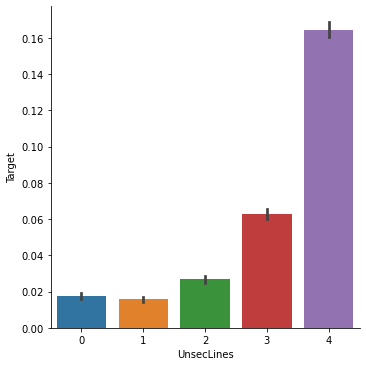

In [26]:
sns.catplot(data = dataset, x='UnsecLines', y='Target', kind='bar');

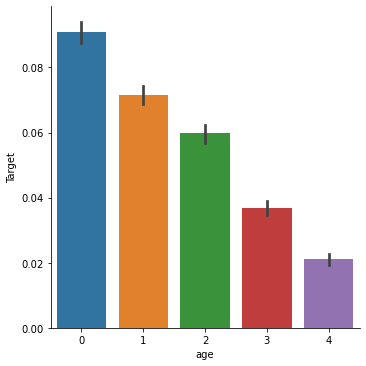

In [27]:
dataset.age = pd.qcut(dataset.age.values, 5).codes # 0-4
sns.catplot(data = dataset, x='age', y='Target', kind='bar');

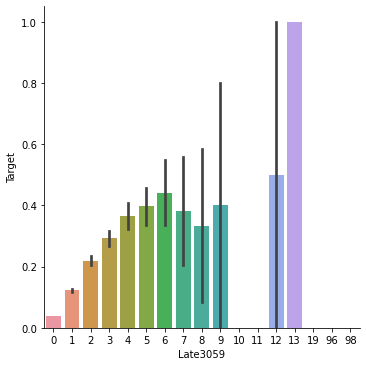

In [28]:
sns.catplot(data = dataset, x='Late3059', y='Target', kind='bar');

In [50]:
dataset.Late3059.value_counts()

0     210910
1      25440
2       6991
3       2586
4       1033
5        445
98       213
6        174
7         76
8         40
9         15
10         8
12         3
13         1
96         1
11         1
19         1
Name: Late3059, dtype: int64

In [89]:
[6 if x >= 6 else x for x in dataset.Late3059]

AttributeError: 'list' object has no attribute 'head'

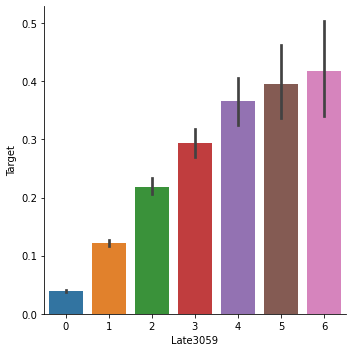

In [51]:
# dataset.Late3059 = pd.qcut(dataset.Late3059.values, 5).codes # 0-4
dataset.Late3059 = [6 if x >= 6 else x for x in dataset.Late3059]
sns.catplot(data = dataset, x='Late3059', y='Target', kind='bar');

In [52]:
dataset.columns

Index(['Target', 'UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps'],
      dtype='object')

In [54]:
dataset.DebtRatio.isnull().sum()

0

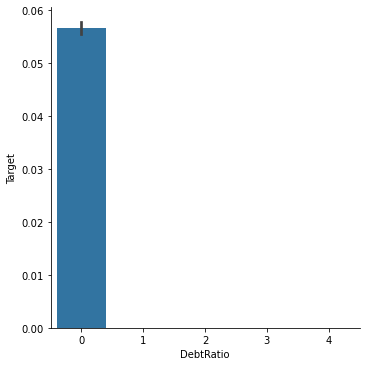

In [31]:
dataset.DebtRatio = pd.cut(dataset.DebtRatio.values, 5).codes
sns.catplot(data = dataset, x='DebtRatio', y='Target', kind='bar');

In [56]:
# sns.catplot(data = dataset, x='MonthlyIncome', y='Target', kind='bar');
dataset.MonthlyIncome.isnull().sum()

48349

In [58]:
dataset.MonthlyIncome.value_counts(dropna=False)

NaN        48349
5000.0      4633
4000.0      3404
6000.0      3220
3000.0      2957
           ...  
12173.0        1
61458.0        1
13388.0        1
17363.0        1
67749.0        1
Name: MonthlyIncome, Length: 15719, dtype: int64

In [57]:
dataset.MonthlyIncome.median()

5415.0

In [59]:
dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

0          9120.0
1          2600.0
2          3042.0
3          3300.0
4         63588.0
           ...   
101498     1400.0
101499     7615.0
101500     5415.0
101501     5415.0
101502     5916.0
Name: MonthlyIncome, Length: 247938, dtype: float64

In [60]:
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())#update

In [61]:
pd.qcut(dataset.MonthlyIncome.values,5).codes

array([4, 0, 0, ..., 2, 2, 3], dtype=int8)

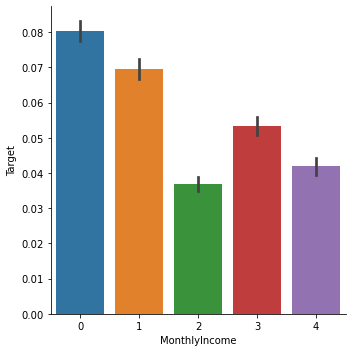

In [62]:
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values,5).codes
sns.catplot(data = dataset, x='MonthlyIncome', y='Target', kind='bar');

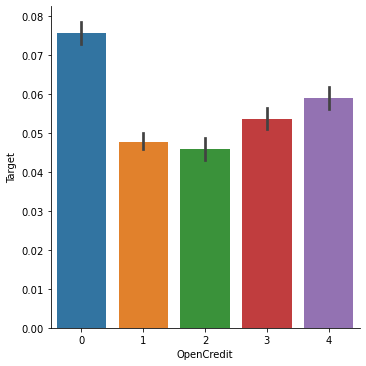

In [35]:
dataset.OpenCredit = pd.qcut(dataset.OpenCredit.values,5).codes
sns.catplot(data = dataset, x='OpenCredit', y='Target', kind='bar');

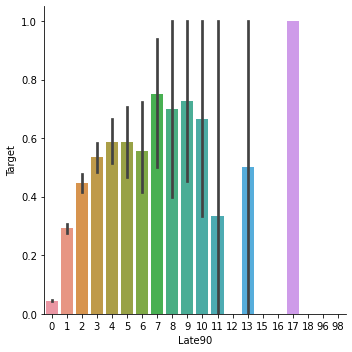

In [63]:
sns.catplot(data = dataset, x='Late90', y='Target', kind='bar');

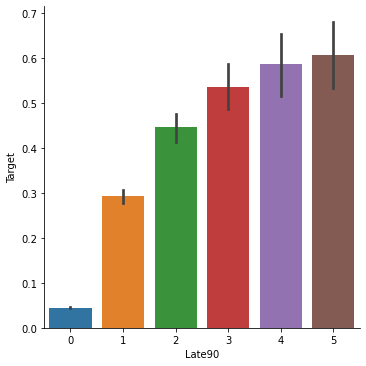

In [37]:
# dataset.Late90 = pd.qcut(dataset.Late90.values,5).codes
dataset.Late90 = [5 if x >= 5 else x for x in dataset.Late90]
sns.catplot(data = dataset, x='Late90', y='Target', kind='bar');

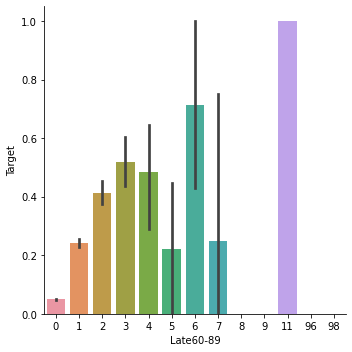

In [65]:
sns.catplot(data = dataset, x='Late60-89', y='Target', kind='bar');
# tại 3 nó thay đổi trend Thì lấy từ trend thôi =3

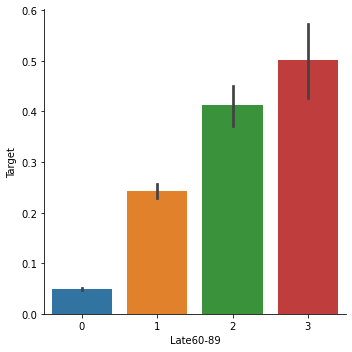

In [67]:
dataset['Late60-89'] = [3 if x >= 3 else x for x in dataset['Late60-89']]
sns.catplot(data = dataset, x='Late60-89', y='Target', kind='bar');

In [85]:
#check the missing value 
dataset.Deps.value_counts(dropna=False)
dataset.Deps.isnull().sum()

6392

In [88]:
dataset.Deps.dropna().value_counts()

0.0     143481
1.0      43398
2.0      32356
3.0      15853
4.0       4770
5.0       1252
6.0        277
7.0         99
8.0         40
10.0         8
9.0          8
20.0         2
13.0         1
43.0         1
Name: Deps, dtype: int64

<AxesSubplot:>

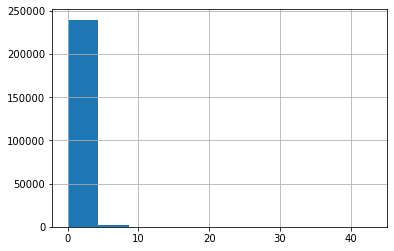

In [93]:
dataset.Deps.dropna().hist()

In [94]:
dataset.Deps.fillna(dataset.Deps.dropna().median())

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
101498    0.0
101499    4.0
101500    0.0
101501    3.0
101502    0.0
Name: Deps, Length: 247938, dtype: float64

In [95]:
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())

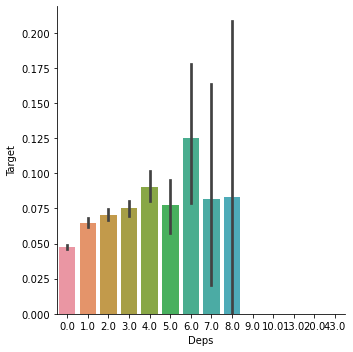

In [96]:
sns.catplot(data = dataset, x='Deps', y='Target', kind='bar');

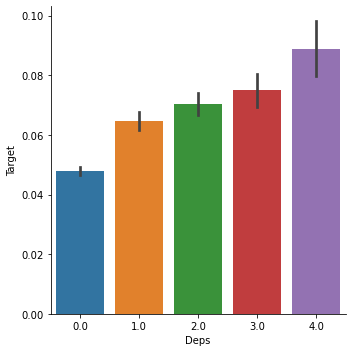

In [98]:
dataset['Deps'] = [4 if x >= 4 else x for x in dataset['Deps']]
sns.catplot(data = dataset, x='Deps', y='Target', kind='bar');

In [99]:
len(dataset.columns)

11

In [100]:
dataset.columns

Index(['Target', 'UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps'],
      dtype='object')

In [ ]:
#Done tạo biến phái sinh-->Onehotendcoding
#tại biến phái sinh:
#B1. check null and process it 
#B2 show the trend of data để chọn qcut point: sns.catplot(data = dataset, x='Deps', y='Target', kind='bar');
#B3: Tạo biến phái sinh pd.qcut(dataset.OpenCredit.values,5).codes

In [5]:
column_names = ['UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps']
for col in column_names:
    dataset = pd.get_dummies(dataset, columns = [col], prefix=col)
#Onehotendcoding

NameError: name 'pd' is not defined

In [4]:
dataset.columns

NameError: name 'dataset' is not defined

**Q16: Train test split**

In [3]:
# train_test_split
train = dataset[:len(df_train)]
test = dataset[len(df_train):]

NameError: name 'dataset' is not defined

**Q17: Train prediction model using Random Forest Classifier**

In [2]:
# X_train, x_test, y_train, y_test
# create model - >sckitlearn RF
# fit(X_train, x_test)
# predict
train['Target'] = train['Target'].astype(int) #casting map{} anyways

X_train = train.drop(labels=['Target'], axis=1)
X_test = test.drop(labels=['Target'], axis=1)
y_train = train['Target'] 
y_test = test['Target']

NameError: name 'train' is not defined

In [1]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
                             #n_estimators=50, 
                             #max_features='sqrt',
                             #max_dept=np.log1p(number_offeatures))
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

**Q18: Get feature importance from classifier**

In [53]:
features  = pd.DataFrame()
features['name'] = X_train.columns
features['importance'] = clf.feature_importances_
features = features.sort_values(by=['importance'], ascending=True)
features

,name,importance
63,PropLines_37,0.000000e+00
56,PropLines_18,0.000000e+00
62,PropLines_32,1.662005e-08
55,PropLines_17,3.819444e-08
19,DebtRatio_2,6.860107e-08
...,...,...
69,Deps_1.0,3.066378e-02
68,Deps_0.0,3.212868e-02
10,Late3059_0,3.630267e-02
4,UnsecLines_4,5.016088e-02


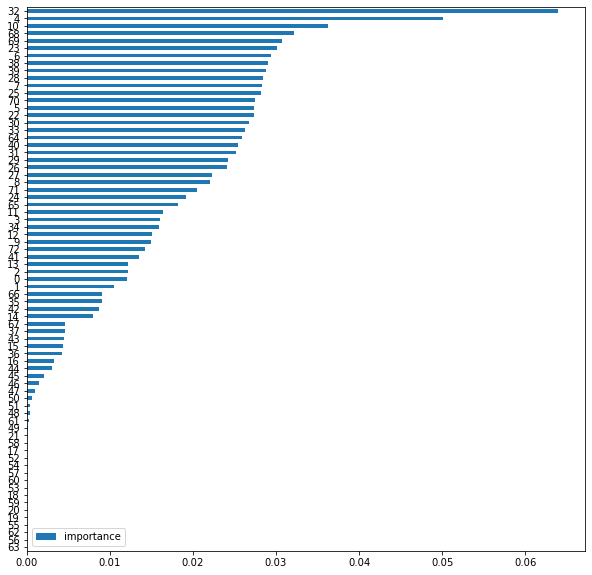

In [57]:
features.plot(kind='barh', figsize=(10,10));

**Q19: Retrain with better parameters**

In [ ]:
# Parameters + change combination of features

**Q20: Predict and evaluate the model performance**

In [59]:
y_pred = clf.predict_proba(X_test)[:,1] #Threshold -> bad rate (defaults) + population rejection
y_pred

array([0.03241386, 0.005     , 0.        , ..., 0.0044068 , 0.08      ,
       0.        ])

<center> <img src="https://media.makeameme.org/created/have-a-nice-17d2442086.jpg" width="500"/> </center>